In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
import collections

In [4]:
train = pd.read_csv('ADM/train-final.csv', header=None)
test = pd.read_csv('ADM/test-final.csv', header=None)

In [5]:
#initial exploration train dataset
train

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,bye,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,you,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,thankyou,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,name,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,love,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.153429,0.653027,2.290336,-0.202696,0.460290,2.337915,-0.285067,0.331688,2.247679,-0.060992,...,0.485318,0.522038,0.435164,0.464692,0.536148,0.538248,0.338490,0.536627,go,15
536,-0.270779,0.692372,2.418405,-0.309432,0.513018,2.427828,-0.367138,0.339803,2.340697,-0.174124,...,0.787530,0.375785,0.490460,0.512968,0.463116,0.507656,0.280617,0.563687,home,17
537,-0.293375,0.679736,2.413071,-0.332449,0.499503,2.442463,-0.395068,0.346635,2.347341,-0.197936,...,0.575436,0.505751,0.331261,0.389225,0.598488,0.617464,0.316425,0.504178,rain,22
538,-0.497183,0.534425,2.322565,-0.557379,0.353817,2.343797,-0.614599,0.217394,2.218595,-0.435612,...,0.759135,0.345677,0.341312,0.408758,0.589787,0.561659,0.399114,0.504443,my,19


In [6]:
#initial exploration test dataset
test

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.332255,0.672471,2.450465,-0.323645,0.486062,2.526748,-0.483695,0.370296,2.534973,-0.172186,...,0.604953,0.464157,0.751404,0.467516,0.306133,0.521694,0.546094,0.439480,wind,28
1,-0.089784,0.656778,2.431880,-0.079363,0.467939,2.429239,-0.193909,0.349866,2.329680,0.081013,...,0.596048,0.461552,0.557319,0.373754,0.515013,0.413323,0.491261,0.530069,day,13
2,-0.427810,0.699557,2.347763,-0.444873,0.530140,2.433568,-0.610365,0.402565,2.398841,-0.264254,...,0.777705,0.318174,0.532617,0.476989,0.487606,0.604556,0.489667,0.433812,afternoon,1
3,-0.089790,0.694279,2.428455,-0.072881,0.520537,2.496676,-0.255747,0.404209,2.520148,0.115363,...,0.551472,0.498960,0.313094,0.450005,0.581886,0.409794,0.377352,0.578679,afternoon,1
4,-0.387741,0.540410,2.399926,-0.406310,0.361768,2.459448,-0.576004,0.262814,2.457772,-0.256852,...,0.684091,0.457543,0.446787,0.499285,0.512345,0.366741,0.468337,0.526775,you,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.120557,0.620886,2.150460,0.111768,0.448294,2.159698,0.021771,0.297987,2.067995,0.297496,...,0.492502,0.471850,0.514066,0.456260,0.493552,0.644065,0.331046,0.482527,cloud,8
536,-0.286926,0.673395,2.408284,-0.324050,0.481795,2.461855,-0.435962,0.337695,2.390008,-0.156024,...,0.605193,0.495232,0.415223,0.503587,0.523376,0.540546,0.296970,0.549112,you,30
537,-0.067440,0.693735,2.366096,-0.099248,0.506985,2.401881,-0.212673,0.369984,2.308468,0.070817,...,0.602493,0.465757,0.561188,0.402575,0.474175,0.498675,0.296885,0.563116,name,20
538,-0.316437,0.542775,2.278472,-0.374890,0.360022,2.296082,-0.445979,0.231794,2.184017,-0.245897,...,0.637756,0.438699,0.419514,0.405346,0.527979,0.323851,0.432784,0.583533,go,15


In [23]:
#Use the method to find atributes with missing values
def find_attributes_with_missing_values(df):
    '''Method that finds missing values per attribute.'''
    miss_val_columns = []
    found = False
    for col in df.columns:
        miss_count = df[col].isnull().sum(axis = 0)
        if miss_count > 0:
            found = True
            print('Attribute ' + str(col) + ' missing values: ' + str(miss_count))   
            miss_val_columns.append(col)
    if not found:
        print("No missing values found!")
    return miss_val_columns 

In [8]:
#Attributes with missing values for train set
train_missing_values = find_attributes_with_missing_values(train)

Attribute 7 missing values: 4
Attribute 8 missing values: 4
Attribute 9 missing values: 4
Attribute 14 missing values: 3
Attribute 15 missing values: 3
Attribute 16 missing values: 3


In [9]:
#Attributes with missing values for test set
test_missing_values = find_attributes_with_missing_values(test)

Attribute 6 missing values: 3
Attribute 7 missing values: 3
Attribute 8 missing values: 6
Attribute 11 missing values: 2
Attribute 12 missing values: 2
Attribute 13 missing values: 2


In [10]:
#Method that extends the ABT table
def complete_abt(original_df, missing_val_columns, categorical=False):
    '''Method that extends the ABT table.'''
    if len(missing_val_columns) != 0:
        new_df = original_df[missing_val_columns].copy()
    else:
        new_df = original_df
    if not categorical: 
        df = new_df.describe()
    else:
        df = new_df.describe(include = 'object')
    missing_row = {}
    cardinality_row = {}
    median_row = {}
    for column in df.columns:
        miss_per = round(((new_df[column].isna().sum() / new_df.shape[0]) * 100), 1)
        missing_row[column] = str(miss_per) + '%' 
        if not categorical:
            cardinality_row[column] = new_df[column].nunique()
            median_row[column] = new_df[column].median()
            
    if not categorical:
        df.loc["median"] = median_row
        df.loc["cardinality"] = cardinality_row    
    df.loc["missing"] = missing_row
    return df

In [11]:
#check abt only for attributes with missing values in train
complete_abt(train, train_missing_values)

,7,8,9,14,15,16
count,536.0,536.0,536.0,537.0,537.0,537.0
mean,0.334582,2.31762,-0.038419,2.255113,0.080669,0.244832
std,0.057019,0.130213,0.238209,0.163521,0.249062,0.120355
min,0.215896,1.958559,-0.52904,1.826848,-0.441503,0.01373
25%,0.299268,2.233972,-0.229325,2.137466,-0.121612,0.170234
50%,0.340286,2.329261,-0.054838,2.252075,0.081936,0.2257
75%,0.376225,2.418436,0.173653,2.373724,0.30166,0.302107
max,0.461244,2.609596,0.399173,2.619495,0.551752,0.627298
median,0.340286,2.329261,-0.054838,2.252075,0.081936,0.2257
cardinality,536.0,536.0,536.0,537.0,537.0,537.0


In [12]:
#check abt only for attributes with missing values in test
complete_abt(test, test_missing_values)

,6,7,8,11,12,13
count,537.0,537.0,534.0,538.0,538.0,538.0
mean,-0.306632,0.342595,2.325115,2.444493,-0.345565,0.165254
std,0.233206,0.05884,0.12958,0.102928,0.240723,0.111679
min,-0.754859,-0.039892,1.957642,2.15031,-0.86401,-0.17088
25%,-0.496169,0.310366,2.235517,2.386573,-0.552341,0.091915
50%,-0.294386,0.34806,2.333017,2.448006,-0.303365,0.148969
75%,-0.115223,0.387474,2.42111,2.513811,-0.156658,0.207852
max,0.669981,0.464273,2.579087,2.727064,0.711699,0.546032
median,-0.294386,0.34806,2.333017,2.448006,-0.303365,0.148969
cardinality,537.0,537.0,534.0,538.0,538.0,538.0


In [13]:
#replace missing values with median
def replace_missing_values_with_median(df, missing_value_columns):
    '''Replace missing values with median.'''
    for i in missing_value_columns:
        if df[i].dtype != 'category':
            df.loc[(df[i].isnull()), i] = df[i].median()
    return df

In [14]:
#replace missing values
imputated_train = replace_missing_values_with_median(train, train_missing_values)
imputated_test = replace_missing_values_with_median(test, test_missing_values)

In [15]:
#check abt for train after replacing missing values
complete_abt(imputated_train, train_missing_values)

,7,8,9,14,15,16
count,540.0,540.0,540.0,540.0,540.0,540.0
mean,0.334624,2.317706,-0.038541,2.255096,0.080676,0.244726
std,0.056809,0.129733,0.237328,0.163065,0.248368,0.120028
min,0.215896,1.958559,-0.52904,1.826848,-0.441503,0.01373
25%,0.299636,2.236382,-0.227209,2.137579,-0.120925,0.170518
50%,0.340286,2.329261,-0.054838,2.252075,0.081936,0.2257
75%,0.375995,2.418194,0.171841,2.371554,0.301587,0.301781
max,0.461244,2.609596,0.399173,2.619495,0.551752,0.627298
median,0.340286,2.329261,-0.054838,2.252075,0.081936,0.2257
cardinality,537.0,537.0,537.0,537.0,537.0,537.0


In [16]:
#check abt for test after replacing missing values
complete_abt(imputated_test, test_missing_values)

,6,7,8,11,12,13
count,540.0,540.0,540.0,540.0,540.0,540.0
mean,-0.306563,0.342625,2.325203,2.444506,-0.345409,0.165193
std,0.232558,0.058677,0.128859,0.102738,0.24029,0.111476
min,-0.754859,-0.039892,1.957642,2.15031,-0.86401,-0.17088
25%,-0.495398,0.310571,2.237514,2.386733,-0.551823,0.091943
50%,-0.294386,0.34806,2.333017,2.448006,-0.303365,0.148969
75%,-0.115324,0.387449,2.420085,2.513694,-0.157647,0.207746
max,0.669981,0.464273,2.579087,2.727064,0.711699,0.546032
median,-0.294386,0.34806,2.333017,2.448006,-0.303365,0.148969
cardinality,537.0,537.0,535.0,539.0,539.0,539.0


In [17]:
#ABT for continuous values train set
complete_abt(imputated_train, [])

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,241
count,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,...,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0
mean,-0.177295,0.642214,2.331659,-0.194741,0.457941,2.371155,-0.320209,0.334624,2.317706,-0.038541,...,0.397871,0.620459,0.445361,0.452434,0.458139,0.514412,0.475896,0.419335,0.521986,15.574074
std,0.2287,0.059042,0.098388,0.233197,0.059164,0.103114,0.229459,0.056809,0.129733,0.237328,...,0.088373,0.105227,0.068612,0.087941,0.089766,0.057214,0.098693,0.0865,0.052269,8.690519
min,-0.643738,0.519223,1.984785,-0.677079,0.340365,2.043202,-0.725647,0.215896,1.958559,-0.52904,...,0.178912,0.256031,0.223113,0.191318,0.23284,0.269233,0.174655,0.213768,0.349608,1.0
25%,-0.371009,0.610317,2.256488,-0.37739,0.426308,2.290459,-0.519382,0.299636,2.236382,-0.227209,...,0.33826,0.549861,0.403733,0.393426,0.39113,0.483939,0.410484,0.358616,0.485843,8.0
50%,-0.147509,0.644106,2.359979,-0.182383,0.460274,2.399004,-0.313721,0.340286,2.329261,-0.054838,...,0.387029,0.621955,0.450252,0.44729,0.453992,0.520876,0.476872,0.417201,0.523685,16.0
75%,0.029912,0.695097,2.404539,0.012955,0.51221,2.448018,-0.13211,0.375995,2.418194,0.171841,...,0.449043,0.707867,0.493773,0.501531,0.511122,0.552783,0.54636,0.47656,0.558321,23.0
max,0.249321,0.739437,2.544698,0.246177,0.56856,2.604842,0.111452,0.461244,2.609596,0.399173,...,0.833097,0.882829,0.613585,0.793975,0.785098,0.630953,0.722162,0.664097,0.654371,30.0
median,-0.147509,0.644106,2.359979,-0.182383,0.460274,2.399004,-0.313721,0.340286,2.329261,-0.054838,...,0.387029,0.621955,0.450252,0.44729,0.453992,0.520876,0.476872,0.417201,0.523685,16.0
cardinality,540.0,540.0,540.0,540.0,540.0,540.0,540.0,537.0,537.0,537.0,...,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,30.0


In [19]:
#ABT for categorical values train set
complete_abt(imputated_train, [], True)

,240
count,540
unique,30
top,child
freq,25
missing,0.0%


In [21]:
#ABT for continuous (target) values test set
complete_abt(imputated_test, [])

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,241
count,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,...,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0
mean,-0.163587,0.651439,2.339771,-0.180112,0.467728,2.378659,-0.306563,0.342625,2.325203,-0.020371,...,0.394695,0.619367,0.446365,0.445393,0.455076,0.516617,0.4746,0.421574,0.52202,15.425926
std,0.232325,0.059352,0.093903,0.236666,0.060321,0.100026,0.232558,0.058677,0.128859,0.243391,...,0.083836,0.1045,0.070175,0.098366,0.095187,0.058977,0.09797,0.089846,0.0513,8.635694
min,-0.670028,0.27157,2.017767,-0.679175,0.055941,2.056211,-0.754859,-0.039892,1.957642,-0.533906,...,0.175306,0.261839,0.234866,0.203178,0.173725,0.269658,0.181301,0.151404,0.364199,1.0
25%,-0.350669,0.621587,2.267825,-0.361278,0.434431,2.298715,-0.495398,0.310571,2.237514,-0.215421,...,0.341903,0.548763,0.404867,0.375385,0.394878,0.480868,0.400486,0.363137,0.487907,8.0
50%,-0.134846,0.669635,2.366226,-0.146811,0.482701,2.402666,-0.294386,0.34806,2.333017,0.033727,...,0.387076,0.621561,0.452342,0.436524,0.449883,0.526649,0.480224,0.418416,0.527114,15.0
75%,0.041236,0.699386,2.408915,0.018526,0.516528,2.450317,-0.115324,0.387449,2.420085,0.18467,...,0.444605,0.697867,0.497812,0.508676,0.512456,0.558937,0.548639,0.479025,0.556804,23.0
max,0.880814,0.73894,2.587793,0.833488,0.573482,2.616181,0.669981,0.464273,2.579087,1.019995,...,0.766212,0.856715,0.613304,0.84128,0.765497,0.639285,0.691755,0.710512,0.675763,30.0
median,-0.134846,0.669635,2.366226,-0.146811,0.482701,2.402666,-0.294386,0.34806,2.333017,0.033727,...,0.387076,0.621561,0.452342,0.436524,0.449883,0.526649,0.480224,0.418416,0.527114,15.0
cardinality,540.0,540.0,540.0,540.0,540.0,540.0,537.0,537.0,535.0,540.0,...,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,30.0


In [22]:
#ABT for categorical (target) values test
complete_abt(imputated_test, [], True)

,240
count,540
unique,30
top,go
freq,24
missing,0.0%


In [105]:
imputated_train

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,bye,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,you,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,thankyou,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,name,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,love,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.153429,0.653027,2.290336,-0.202696,0.460290,2.337915,-0.285067,0.331688,2.247679,-0.060992,...,0.485318,0.522038,0.435164,0.464692,0.536148,0.538248,0.338490,0.536627,go,15
536,-0.270779,0.692372,2.418405,-0.309432,0.513018,2.427828,-0.367138,0.339803,2.340697,-0.174124,...,0.787530,0.375785,0.490460,0.512968,0.463116,0.507656,0.280617,0.563687,home,17
537,-0.293375,0.679736,2.413071,-0.332449,0.499503,2.442463,-0.395068,0.346635,2.347341,-0.197936,...,0.575436,0.505751,0.331261,0.389225,0.598488,0.617464,0.316425,0.504178,rain,22
538,-0.497183,0.534425,2.322565,-0.557379,0.353817,2.343797,-0.614599,0.217394,2.218595,-0.435612,...,0.759135,0.345677,0.341312,0.408758,0.589787,0.561659,0.399114,0.504443,my,19


In [106]:
#Drop redundant column
imputated_train.drop(columns=[240])
imputated_test.drop(columns=[240])

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,241
0,-0.332255,0.672471,2.450465,-0.323645,0.486062,2.526748,-0.483695,0.370296,2.534973,-0.172186,...,0.426959,0.604953,0.464157,0.751404,0.467516,0.306133,0.521694,0.546094,0.439480,28
1,-0.089784,0.656778,2.431880,-0.079363,0.467939,2.429239,-0.193909,0.349866,2.329680,0.081013,...,0.456633,0.596048,0.461552,0.557319,0.373754,0.515013,0.413323,0.491261,0.530069,13
2,-0.427810,0.699557,2.347763,-0.444873,0.530140,2.433568,-0.610365,0.402565,2.398841,-0.264254,...,0.412314,0.777705,0.318174,0.532617,0.476989,0.487606,0.604556,0.489667,0.433812,1
3,-0.089790,0.694279,2.428455,-0.072881,0.520537,2.496676,-0.255747,0.404209,2.520148,0.115363,...,0.328799,0.551472,0.498960,0.313094,0.450005,0.581886,0.409794,0.377352,0.578679,1
4,-0.387741,0.540410,2.399926,-0.406310,0.361768,2.459448,-0.576004,0.262814,2.457772,-0.256852,...,0.311284,0.684091,0.457543,0.446787,0.499285,0.512345,0.366741,0.468337,0.526775,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.120557,0.620886,2.150460,0.111768,0.448294,2.159698,0.021771,0.297987,2.067995,0.297496,...,0.546645,0.492502,0.471850,0.514066,0.456260,0.493552,0.644065,0.331046,0.482527,8
536,-0.286926,0.673395,2.408284,-0.324050,0.481795,2.461855,-0.435962,0.337695,2.390008,-0.156024,...,0.346754,0.605193,0.495232,0.415223,0.503587,0.523376,0.540546,0.296970,0.549112,30
537,-0.067440,0.693735,2.366096,-0.099248,0.506985,2.401881,-0.212673,0.369984,2.308468,0.070817,...,0.420935,0.602493,0.465757,0.561188,0.402575,0.474175,0.498675,0.296885,0.563116,20
538,-0.316437,0.542775,2.278472,-0.374890,0.360022,2.296082,-0.445979,0.231794,2.184017,-0.245897,...,0.409146,0.637756,0.438699,0.419514,0.405346,0.527979,0.323851,0.432784,0.583533,15


In [109]:
duplicated_rows_train = imputated_train[imputated_train.duplicated()]
print("Duplicate Rows in train set:")
duplicated_rows_train

Duplicate Rows in train set:


,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241


In [110]:
duplicated_rows_test = imputated_test[imputated_test.duplicated()]
print("Duplicate Rows in test set:")
duplicated_rows_test

Duplicate Rows in test set:


,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241


In [111]:
#save data with imputed values
imputated_train.to_csv('ADM/train-final_imputation.csv')
imputated_test.to_csv('ADM/train-final_imputation.csv')

In [113]:
# Visualization
def plot_labels(ax, space=5, decs=0):
    """Method that adds labels to the end of each bar"""
    for rectangle in ax.patches:
        y_v = rectangle.get_height()
        x_v = rectangle.get_x() + rectangle.get_width() / 2
        vert_align = 'bottom'
        if y_v < 0:
            space *= -1
            vert_align = 'top'

        lbl = ("{:." + str(decs) + "f}").format(y_v)
        ax.annotate(lbl, (x_v, y_v), xytext=(0, space), textcoords="offset points", ha='center', va=vert_align)   

def plot_target_distribution(df, size=16, rot=35, fig_size=(16, 6)):
    """Method thatplots the distribution of target values"""
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    plt.bar(df[240].value_counts().keys().values,
            df[240].value_counts().values, color='#6495ED')
    plt.xticks(range(len(df[240].value_counts().keys().values)),
               df[240].value_counts().keys().values, rotation=rot)
    plot_labels(ax, space=5)
    plt.title('Frequency of sign gestures in train set', fontsize=size)
    plt.show()

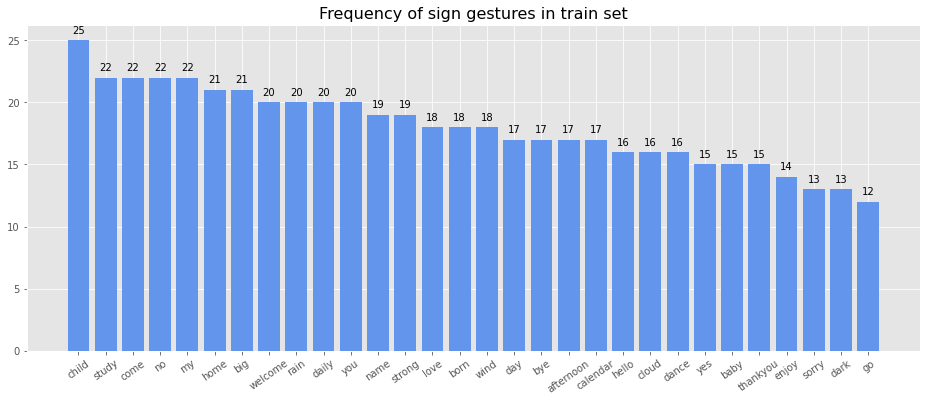

In [114]:
plot_target_distribution(imputated_train)

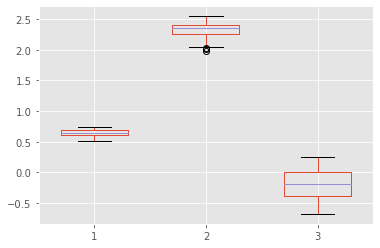

In [115]:
boxplot = train.boxplot(column=[1, 2, 3], widths = 0.6, patch_artist = False)  